<a href="https://colab.research.google.com/github/ferjorosa/learn-fastai/blob/main/fastbook_ch4_questionnaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questionnaire Chapter 4

In [15]:
#hide (Google Colab)
!pip install fastai --upgrade -q
import fastai
print(fastai.__version__)

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 189 kB 4.1 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
2.5.3
     |████████████████████████████████| 720 kB 4.1 MB/s 
     |████████████████████████████████| 1.2 MB 37.4 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 51 kB 283 kB/s 
Mounted at /content/gdrive


**Question 1: How is a grayscale image represented on a computer? How about a color image?**

A grayscale image is represented using a matrix, whose size corresponds to the number of pixels, where each matrix is ranged in [0,255].

A color image is represented using a rank 3 tensor with 3 channels (red, green, blue), where each channel considers a matrix whose values correspond to the [0,255] range.

**Question 2: How are the fields and folders of the MNIST_SAMPLE dataset structured? Why?**

Each image has its own folder. For example threes are stored in the "threes" fold. In addition, image folders are divided into train and validation.

**Question 3: Explain how the pixel similarity approach to classifying digits works**

For each number, we estimate an "ideal" image that corresponds to the mean values of each of its pixels. Then, in order to classify an image as a specific number, we estimate the distance between the new image and all of the ideal images considered. The image is assigned a class corresponding to the smallest distance.

**Question 4: What is a list comprehension? Create one that selects odd numbers from a list and doubles them**

In [ ]:
l = [2,3,4,5,6]

[l[i]**2 for i in range(0, len(l), 2)]

**Question 5: What is a rank-3 tensor?**

It is a tensor with 3 dimensions. For example an RGB color image is a rank-3 tensor [i, j, k] where:
* i: number of channels, i.e., 3 (red, green, blue)
* j: number of row pixels
* k: number of column pixels

Example: [3, 20, 20] is a RGB image with dimension 20x20

**Question 6: What is the difference between tensor rank and shape? How do you get the rank from the shape**

Tensor rank is defined as the number of dimensions of a tensor. On the other hand, tensor shape represents the size of the each dimension. For example, a tensor with rank 2 is a two-dimensional array whose dimension sizes may be 10x5 (i.e., [10, 5])

In [ ]:
import torch

t = torch.tensor([[[1,2,3], [1,2,3]], [[3,4,5], [3,4,5]]])
print("Shape: " + str(t.shape))
print("Rank: " + str(t.ndim))

Shape: torch.Size([2, 2, 3])
Rank: 3


In [ ]:
torch.zeros([3,5,2]) #3 matrices of 5x2

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]])

**Question 7: What are RMSE and L1 norm?**
* RMSE: root mean-squared error. It is defined as the square root of the average squared distance between the actual score and the predicted score:
* L1 norm: manhattan distance. For two vectorx $\mathbf{x}$ and $\mathbf{y}$, it is defined as $\sum_{i} |x_{i} - y_{i}|$

**Question 8: How can you apply a calculation on thousand os numbers at once many thousands of times faster than a Python loop?**

We can speed calculations using vectorization. [More information](https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/)

**Question 9: Create a 3x3 tensor or array containing the numbers from 1 to 9. Double it. Select the bottom right four numbers**

We use view instead of reshape to avoid the extra computation

In [ ]:
matrix = torch.arange(1,10).view([3,3])
matrix_sq = matrix**2
matrix_sq.view(3*3)[-4:]

tensor([36, 49, 64, 81])

**Question 10: What is broadcasting?**

*My answer:* When doing computations with vectors of unmatching dimensions, broadcasting is the process of temporarily expanding the dimension of the smaller tensor to match the dimension of the larger tensor

*Proper answer:* The term broadcasting describes how numpy/pytorch treats tensors with different shapes during arithmetic operations. Subject to certain constraints, the smaller tensor is “broadcast” across the larger tensor so that they have compatible shapes.

**Question 11: Are metrics generally calculated using the training set or the validation set? Why?**

We consider a loss function with the training data. We use metrics such as accuracy or RMSE with the validation data. Loss functions are better for optimization purposes. Metrics do not usually have a "gradient" nor are easy to directly optimize, so we use them in validation.

**Question 12: What is SGD?**

*My answer:* The stochastic gradient descent is a variant of the gradient descent where we use a random sample or batch to optimize the parameters of the function (instead of the whole training data)

*Proper answer:* In both gradient descent (GD) and stochastic gradient descent (SGD), you update a set of parameters in an iterative manner to minimize an error function.

While in GD, you have to run through ALL the samples in your training set to do a single update for a parameter in a particular iteration, in SGD, on the other hand, you use ONLY ONE or SUBSET of training sample from your training set to do the update for a parameter in a particular iteration. If you use SUBSET, it is called Minibatch Stochastic gradient Descent.

**Question 13: Why does SGD use mini-batches?**

If the number of training samples is very large, then using gradient descent may take too long because in every iteration you are running through the complete training set. Instead, every iteration of SGD only considers a handful of training samples and updates the parameters with them.


**Question 14: What are the seven steos ub SGD for machine learning?**

1. Initialize
2. Predict
3. Estimate loss
4. Calculate gradient
5. Update parameter values with gradient (i.e., step)
6. Repeat the process
7. Stop if the number of epochs is reached or if the loss did not decrease enough


**Question 15: How do we initialize the weights in a model?**

There may be multiple approaches. In our case, we use random values. Andrew Ng proposes to use small random values.

**Question 16: What is loss?**

The loss function measures the ability of our model to represent and predict the training data. We use a function that can be easily optimized, usually via a gradient descent method.

**Question 17: Why can't we always use a high learning rate?**

The learning rate is a parameter of the gradient descent algorithm that establishes the "step size" of the algorithm. A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck.

**Question 18: What is a gradient?**

In *mathematics*, the gradient of a function is another function that corresponds to its first derivative. However, in *deep learning* the gradient usually refers to the value of the function's derivative at a particular argument value

**Question 19: Do you need to calculate gradients yourself?**

By using Pytorch and other libraries with automatic differentiation, we are not required to know how to estimate the gradients ourselves.

**Question 20: Why can't we use accuracy as a loss function?**

Because its gradient could not be optimized.

**Question 21: What is special about the sigmoid function?**

The sigmoid is a symmetric function with a maximum value of 1.0 and a minimum value of 0.0, which makes it appropriate for probabilistic binary classification problems.

**Question 22: What is the difference between a loss function and a metric?**

A loss function can be easily optimized via gradient descent but it is not easily interpretable by humans. On the other hand, a metric is easily interpreted but it is diffuclt to optimize. For example classification accuracy.

**Question 23: What is the function to calculate new weights using a learning rate?**

The gradient descent method.

**Question 24: What does the ```DataLoader``` class do?**

It allows to iterate through a dataset using the Pytorch library.

**Question 25: Write pseudocode showing the basic steps taken in each epoch of SGD?**

The pseudocode of the traditional SGD algorithm is the following:

1. Initialize the weights $w$ and introduce the learning rate $l$ and data $\mathcal{D}$.
2. For each iteration $t \in [1, \dots, T]$:
  * Draw a random instance $x$ with replacement from the data $\mathcal{D}$
  * Use current weights to predict the value of the target variable
  * Compute the loss
  * Compute the gradients $g$
  * Update weight values with the gradient $w = w - (g * l)$

The implementation used by Pytorch is other, which combines ideas from SGD and from mini-batch gradient descent:

1. Initialize the weights $w$, introduce the learning rate $l$, the data $\mathcal{D}$, and the mini-batch size $m$.
2. For epoch $e \in [1, \dots, E]$:
  * Suffle $\mathcal{D}$ to prevent cycles.
  * Generate a batch of size $m$ with instances sampled without replacement
  * Use current weights to predict the values of the target variables in the mini-batch
  * Compute the loss using the mini-batch
  * Compute the gradient $g$ using the mini-batch
  * Update weight values with the gradient $w = w - (g * l)$

  [More information](https://sebastianraschka.com/faq/docs/sgd-methods.html)


**Question 26: Create a function that if passed arguments two arguments ```[1,2,3,4]``` and 'abcd', returns ```[(1,'a'),(2,'b'),(3,'c'),(4,'d')]```. What is special about that output data structure?**

What is interesting about this data strucuture is that it perfectly embodies the separation between predictor and predictie variables for each data instance.

In [2]:
numbers = [1, 2, 3, 4]
letters = ['a', 'b', 'c', 'd']

list(zip(numbers, letters))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

**Question 27: What does view do in PyTorch?**

It allows to "reshape" a tensor without modyfing the underlying structure.

**Question 28: What are the bias parameters in a neural network**

Linear activation functions are linear regressions. Therefore the bias parameters (also known as the intercept) is a key element in the linear regression definition that adds a constant value to the function: $y = w*x + b$, where $b$ is the bias.

**Question 29: What does the ```@``` operator do in PyTorch?**

Matrix multiplication.

In [8]:
import torch

mat1 = torch.randn(2, 3)
mat2 = torch.randn(3, 2)

print(torch.mm(mat1, mat2))
print(mat1 @ mat2)
print(torch.matmul(mat1, mat2))

tensor([[-0.1905,  0.2841],
        [ 1.3964, -0.0828]])
tensor([[-0.1905,  0.2841],
        [ 1.3964, -0.0828]])
tensor([[-0.1905,  0.2841],
        [ 1.3964, -0.0828]])


**Question 30: What does the ```backward()``` method do?**

It computes the gradients of current tensor. It corresponds to a part of the backward pass in backpropagation (the other part is the update of the weights using the newly calculated gradient values).

**Question 31: Why do we have to zero the gradients?**

Because PyTorch accumulates the gradients on subsequent backward passes. So, for every mini-batch we need to explicitly set the gradients to zero before starting to do backpropragation.

**Question 32: What information do we have to pass to ```Learner```?**

* A ```DataLoaders``` object with the train ```DataLoader``` and the validation ```DataLoader```.
* The model.
* The optimizer.
* The loss function.
* The metric

[Learner documentation in the FastAI API](https://docs.fast.ai/learner.html#Learner)

**Question 33: Show Python or pseudocode for the basic steps of a training loop**

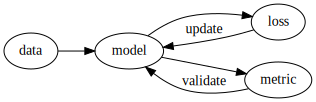

In [14]:
import graphviz

def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

gv('''
data->model->loss
model->metric
metric->model[label=validate]
loss->model[label=update]
''')

**Question 34: What is ReLU? Draw a plot of it for values from -2 to +2**

ReLU stands for "Regularized Linear Unit". It is a non-linear activation function that is used instead of the sigmoid or tanh functions due to to its simplicity and speed of computation.

It assigns 0 to negative values and maintains positive values

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


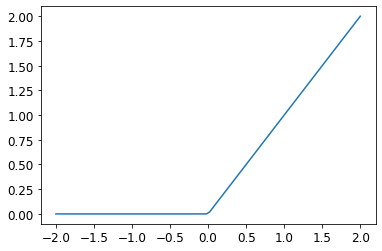

In [20]:
from fastbook import *

plot_function(F.relu)

**Question 35: What is an activation function?**

It defines how the linear output of a layer is transformed. The majority of activation functions are non-linear to give more flexibility to the neural network model.

**Question 36: What is the difference between ```F.relu``` and ```nn.ReLU```?**

F. relu is a Python function and nn.Relu is a Python class

**Question 37: The universal approximation theorem shows that any function can be approximated as closely as needed using just one nonlinearity. So why do we normally use more?**

Because using a single layer is much more complex to train and while it is theoretically possible, in practive we have observed better results with multiple smaller layers.